# 2021 Intro. to Machine Learning 
## Program Assignment #4 - Linear Regression & Logistic Regression


### 0816153 陳琮方

In [1]:
import random
import numpy as np

# Linear Regression

## Data Generation
- Randomly generate 1000 $(x_i,y_i)$ pairs which follow the equation
$y_i\ =3x_i^3+2x_i^2-3x_i+1+\epsilon_i$
- where $−1.5\ <\ X_i\ <\ 1.0$, $\epsilon_i\sim N(0, 0.25)$ and N represents Normal distribution

In [2]:
MU = 0
SIGMA = 0.5
SIZE = 1000
X_MIN = -1.5
X_MAX = 1.0

def f(x, e):
    return 3 * (x ** 3) + 2 * (x ** 2) - 3 * x + 1 + e

e = np.random.normal(MU, SIGMA, SIZE)
x = np.random.uniform(X_MIN, X_MAX, SIZE)
y = np.array([f(x[i], e[i]) for i in range(SIZE)])

## Data Preprocessing
- Generate degree-$K$ polynomial features $\hat{x}$ from $x$
- experiments 4 different $K$ settings, $K=1,2,3,4$

    我這裡使用```sklearn```套件，將不同的 $K$ 值帶入

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
xx = x.reshape(-1, 1)
xs = [xx, xx, xx, xx]

for i in [1, 2, 3, 4]:
    poly = PolynomialFeatures(i)
    xs[i - 1] = poly.fit_transform(xs[i - 1])

## Model Construction
- Linear Regression model

    我這裡使用```sklearn```套件，並同時將係數紀錄下來，存成 latex 供後面使用

In [5]:
from sklearn.linear_model import LinearRegression

cof = []
leg = []

for i in range(4):
    reg = LinearRegression().fit(xs[i], y)
    cof.append(reg.coef_)
    cof[i][0] = reg.intercept_
    ss = "$"
    for j in range(len(cof[i])):
        if j != 0 and cof[i][j] > 0:
            ss = ss + '+'
        ss = ss + ("{:.2f}".format(cof[i][j]))
        if j == 1:
            ss = ss + f'\ ×\ X_i'
        if j >= 2:
            ss = ss + f'\ ×\ X_i^{j}'
    ss = ss + '$'
    leg.append(ss)

## Results

這裡使用 ```seaborn``` 套件，將點跟預測的線畫出

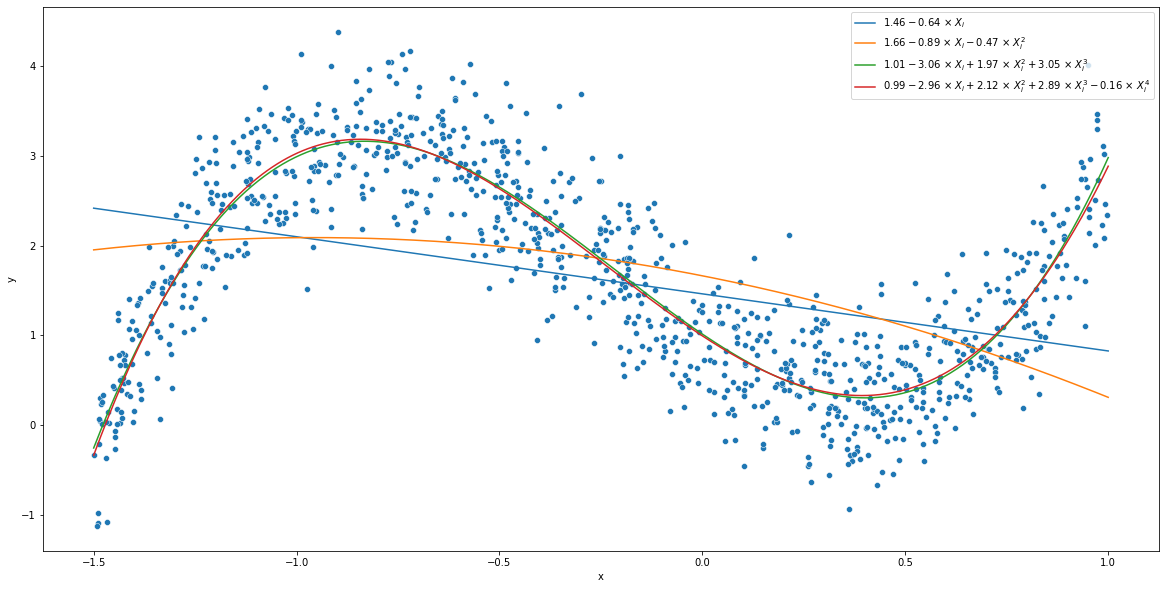

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data_dot = pd.DataFrame()
data_dot['x'] = x
data_dot['y'] = y

fig, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(data = data_dot, x = 'x', y = 'y', ax = ax)

now_x = np.linspace(-1.5, 1, SIZE)
data_lin = pd.DataFrame()
data_lin['x'] = now_x

for i in range(4):
    now_c = np.flip(cof[i])
    now_y = np.polyval(now_c, now_x)
    data_lin['y'] = now_y
    sns.lineplot(data = data_lin, x = 'x', y = 'y', ax = ax)
    
ax.legend(leg)

---

# Logistic Regression

## Data Generation
- Randomly generate 1000 $(x_{i0},x_{i1}, y_i)$ triplets which follows
$
\begin{bmatrix} 
x_{i0} \\
x_{i1}
\end{bmatrix}
\sim
N(\begin{bmatrix} 
y_{i} \\
y_{i}
\end{bmatrix}, \begin{bmatrix} 
0.1\ 0.0 \\
0.0\ 0.1
\end{bmatrix})
$
where $y_i$ is randomly assigned as 0 or 1.

In [7]:
ys = [random.sample([0, 1], 1) for i in range(SIZE)]
ys = np.array(ys).flatten()
xs = []
for i in range(SIZE):
    now = np.random.multivariate_normal([ys[i], ys[i]], [[0.1, 0], [0, 0.1]])
    xs.append(now)

xs = np.array(xs)
print(f'Xs shape = {xs.shape}')

Xs shape = (1000, 2)


## Model Construction
- Logistic Regression Model
我這裡使用```sklearn```套件 ```LogisticRegression```。

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(xs, ys)
predict_y = clf.predict(xs)

## Results

Accuracy of the predict result show below.

Also the model weights and the corresponded terms.

In [9]:
from sklearn.metrics import accuracy_score
print(f'Accuracy = {accuracy_score(ys, predict_y)}')

Accuracy = 0.988


In [10]:
from IPython.display import display, Latex

cof = np.array(clf.coef_).flatten()
cot = clf.intercept_
ss = 'y_i = L(' + "{:.1f}".format(cot[0]) + f'+ {"{:.1f}".format(cof[0])}\ × '
ss = ss + 'x_{i0} + ' + f'{"{:.1f}".format(cof[1])} × ' + 'x_{i1})'

display(Latex(f'${ss}$'))

<IPython.core.display.Latex object>

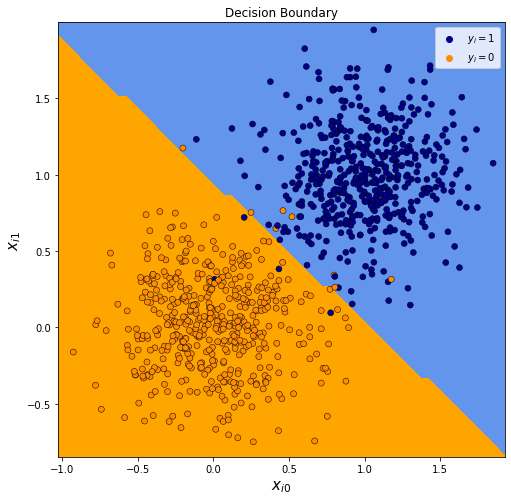

In [11]:
import seaborn as sns
from matplotlib.colors import ListedColormap

h = 0.05 # step size in mesh
ys = ['$y_i = 0$' if i == 0 else '$y_i = 1$' for i in ys]

cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = {'$y_i = 0$' : "darkorange", '$y_i = 1$' : "darkblue"}

x_min, x_max = xs[:, 0].min() - 0.1, xs[:, 0].max() + 0.1
y_min, y_max = xs[:, 1].min() - 0.1, xs[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, cmap = cmap_light)

sns.scatterplot(
    x = xs[:, 0],
    y = xs[:, 1],
    hue = ys,
    palette = cmap_bold,
    alpha = 1.0,
    edgecolor = "black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Decision Boundary')

x_lab = '$x_{i0}$'
y_lab = '$x_{i1}$'
plt.ylabel(y_lab, fontsize = 15)
plt.xlabel(x_lab, fontsize = 15)
plt.show()